# LendingClub - Logistic Regression 

In [1]:
loans=read.csv("loans.csv")

In [2]:
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : Factor w/ 7 levels "all_other","credit_card",..: 3 2 3 3 2 2 3 1 5 3 ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [3]:
summary(loans)

 credit.policy                 purpose        int.rate       installment    
 Min.   :0.000   all_other         :2331   Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   credit_card       :1262   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   debt_consolidation:3957   Median :0.1221   Median :268.95  
 Mean   :0.805   educational       : 343   Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000   home_improvement  : 629   3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000   major_purchase    : 437   Max.   :0.2164   Max.   :940.14  
                 small_business    : 619                                    
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.928   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4562    
 3rd Qu.:11.290   3rd Qu.:17.950   3rd 

Fill the missing value

In [4]:
library(mice)

Loading required package: Rcpp
Loading required package: lattice
mice 2.22 2014-06-10


Fill the missing values for all the attributes except class

In [6]:
fill_feature = setdiff(names(loans),"not.fully.paid")

Fill the missed values based on the available non missing variables Ex if it is raining, missing temperature value will be less. (Multivariate Imputation by Chained Equations in R)

In [7]:
complete_feature = complete(mice(loans[fill_feature]))


 iter imp variable
  1   1  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  1   2  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  1   3  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  1   4  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  1   5  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   1  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   2  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   3  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   4  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  2   5  log.annual.inc  days.with.cr.line  revol.util  inq.last.6mths  delinq.2yrs  pub.rec
  3   1  log.annual.inc  days.with.cr.line  revol.

In [8]:
loans[fill_feature]= complete_feature

In [2]:
Feature with different level are reduced to same level. Higher value feature should not dominate the lower value

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected symbol
1: Feature with
            ^


scale_features = setdiff(names(loans),c("not.fully.paid","purpose"))

In [10]:
scaled_features=scale(loans[scale_features])

In [11]:
set.seed(144)

In [12]:
library(caTools)

Split the data into training and test data

In [13]:
split = sample.split(loans$not.fully.paid, SplitRatio = 0.75)

In [23]:
Train = subset(loans, split == TRUE)

In [22]:
Test = subset(loans, split == FALSE)

In [29]:
loanTrain = read.csv("loanTrain.csv")

In [30]:
loanTest = read.csv("loanTest.csv")

Create Linear regression model

In [31]:
Model = glm( not.fully.paid~., data=loanTrain, family=binomial)

In [32]:
summary(Model)


Call:
glm(formula = not.fully.paid ~ ., family = binomial, data = loanTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1429  -0.6214  -0.4942  -0.3599   2.6570  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                9.150e+00  1.501e+00   6.095 1.10e-09 ***
credit.policy             -3.385e-01  9.740e-02  -3.475 0.000511 ***
purposecredit_card        -6.105e-01  1.290e-01  -4.734 2.20e-06 ***
purposedebt_consolidation -3.486e-01  8.917e-02  -3.910 9.24e-05 ***
purposeeducational         1.315e-01  1.700e-01   0.774 0.439147    
purposehome_improvement    2.105e-01  1.418e-01   1.485 0.137594    
purposemajor_purchase     -4.829e-01  1.948e-01  -2.479 0.013191 *  
purposesmall_business      4.621e-01  1.356e-01   3.409 0.000652 ***
int.rate                   5.718e-01  2.010e+00   0.285 0.776001    
installment                1.298e-03  2.025e-04   6.411 1.45e-10 ***
log.annual.inc            -4.249e-

In [33]:
loanTest$predict.test = predict(Model, type="response", newdata=loanTest)

Predict the output of loanTest

In [34]:
table(loanTest$not.fully.paid,as.numeric(loanTest$predict.test>0.5))

   
       0    1
  0 2001   10
  1  378    5

Look at the summary function, why is int.rate not influencial

Features may be correlated. 

correlationMatrix <- cor(loans[scale_features])

Find the highly correlated feature

In [36]:
library(caret)

Loading required package: ggplot2


In [37]:
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.5,verbose = TRUE)

Compare row 6  and column  2 with corr  0.715 
  Means:  0.261 vs 0.137 so flagging column 6 
Compare row 1  and column  10 with corr  0.536 
  Means:  0.153 vs 0.126 so flagging column 1 
All correlations <= 0.5 


In [38]:
 Model = glm( not.fully.paid~credit.policy+purpose+int.rate+installment+log.annual.inc+dti+days.with.cr.line+revol.bal+revol.util+inq.last.6mths+delinq.2yrs +pub.rec, data=loanTrain, family=binomial)

In [39]:
loanTest$predict.test = predict(Model, type="response", newdata=loanTest)

In [23]:
table(loanTest$not.fully.paid,as.numeric(loanTest$predict.test>0.5))

   
       0    1
  0 2001   10
  1  375    8

Slight improvement in the model

Selecting feature smartly will improve your prediction

--------------------------------------------------------

Change the g function manually

Find the coefficient of the model

betas <- coef(Model)

In [41]:
betas

(Intercept)             credit.policy        purposecredit_card 
             1.695100e+00             -4.482478e-01             -5.830403e-01 
purposedebt_consolidation        purposeeducational   purposehome_improvement 
            -3.165971e-01              1.510845e-01              1.949450e-01 
    purposemajor_purchase     purposesmall_business                  int.rate 
            -5.103748e-01              3.482395e-01              7.464357e+00 
              installment            log.annual.inc                       dti 
             9.367194e-04             -4.162334e-01              3.155888e-03 
        days.with.cr.line                 revol.bal                revol.util 
            -1.962263e-05              2.510540e-06              5.383852e-03 
           inq.last.6mths               delinq.2yrs                   pub.rec 
             7.841837e-02              1.817421e-02              4.128181e-01

Convert dataframe into matrix (for multiplication)

In [8]:
para=c()
for(i in seq(1,length(betas)))
{
    para[i]= betas[i]
}

ERROR: Error in seq.default(1, length(betas)): object 'betas' not found


In [43]:
X <- model.matrix(not.fully.paid~credit.policy+purpose+int.rate+installment+log.annual.inc+dti+days.with.cr.line+revol.bal+revol.util+inq.last.6mths+delinq.2yrs +pub.rec, data=loanTest)

Extract the probability of the class

In [44]:
prob_class <- 1 / (1 +  exp(-(X %*% para)))

Same result

In [45]:
table(loanTest$not.fully.paid,as.numeric(prob_class>0.5))

   
       0    1
  0 2001   10
  1  375    8

In [46]:
prob_class <- 1 / (1 +  exp(-(X %*% para))/2)

In [47]:
table(loanTest$not.fully.paid,as.numeric(prob_class>0.5))

   
       0    1
  0 1940   71
  1  337   46

Changing the g function may improve the prediction

In [48]:
library(gplots)

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [49]:
library(ROCR)

Plotting the precision and specifivity will give better prediction

In [50]:
pred= prediction(prob_class,loanTest$not.fully.paid)

In [51]:
ROCRperf = performance(pred, "ppv", "tpr")

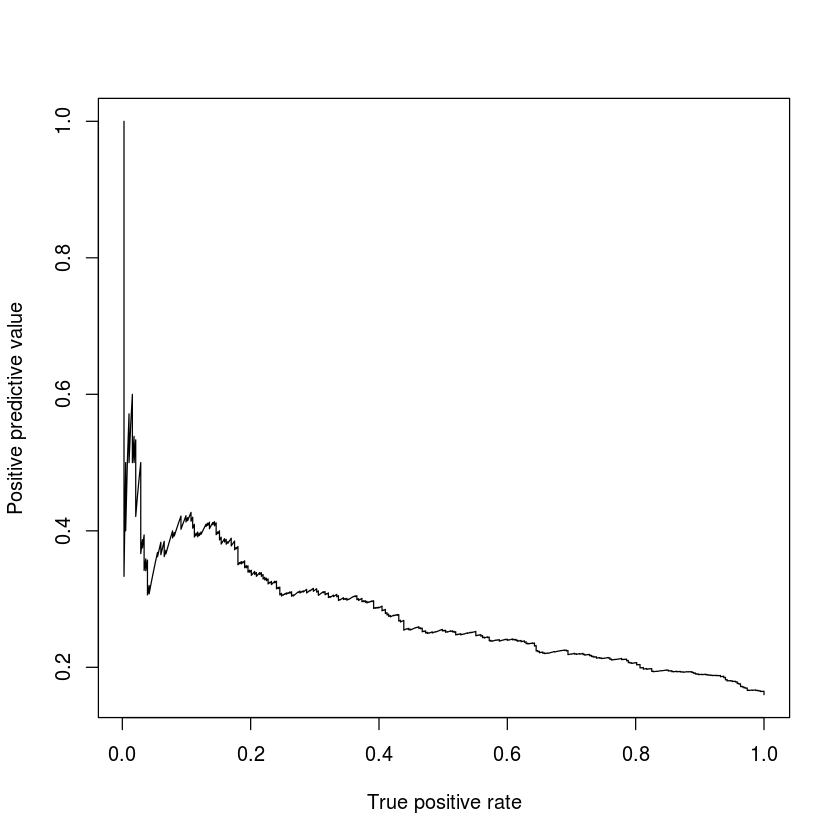

In [52]:
plot(ROCRperf)

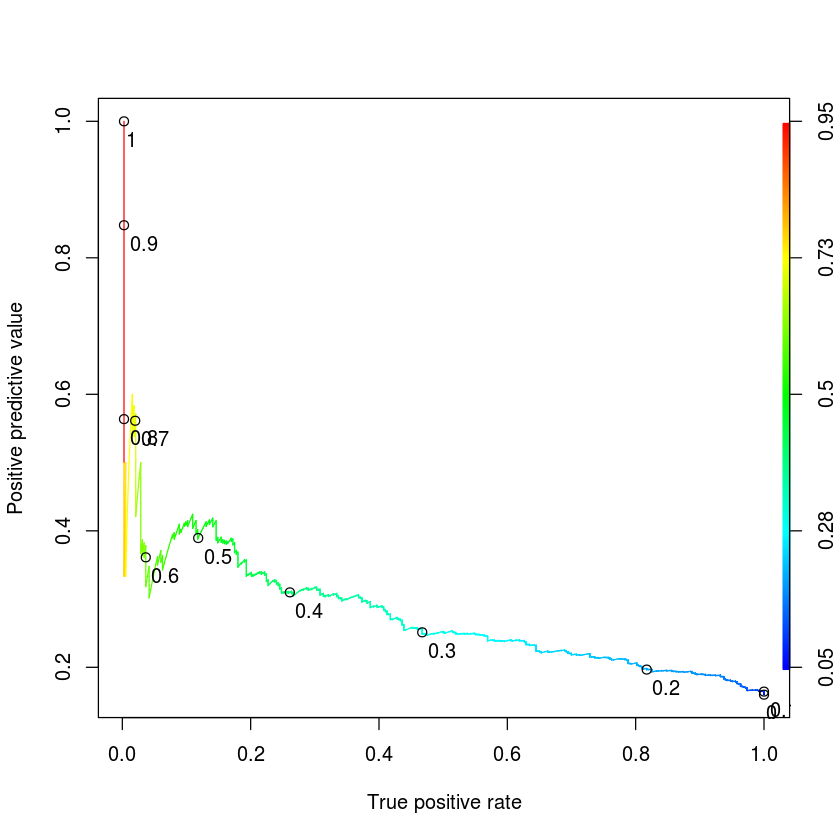

In [37]:
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.1), text.adj=c(-0.2,1.7))